# **Credit Score Movement Prediction Using Machine Learning for the next 3 months**

# **Objective of the project**

1. **Understanding Credit Score Movement**:
Understand the dynamics behind changes in a customer’s credit score and the financial behaviors that influence whether a score increases, decreases, or remains stable over a short-term horizon of the next 3 months.

2. **Simulating Realistic Customer Credit Data**:
Generate a synthetic dataset that realistically reflects monthly financial behavior of customers, including credit usage, repayments, delinquencies, and inquiries—mimicking the data that financial institutions rely on to monitor credit risk.

3. **Building Machine Learning Models for Predictive Classification**:
Train multi-class classification models like Logistic Regression, Decision Trees, Random Forest, and XGBoost to predict the credit score movement class (increase, decrease, or stable) for each customer.

4. **Model Evaluation and Interpretation**:
Evaluate model performance using metrics such as accuracy, F1-score, and class-wise recall. Apply explainability techniques to interpret model predictions and uncover key drivers behind predicted credit score changes in the upcoming 3 months.

# **Step 2: Dataset Generation and Feature Engineering**
**2.1 Objective of This Step**
The goal is to simulate a realistic customer-month-level dataset for predicting whether a customer's credit score will increase, decrease, or remain stable in the next 3 months. This dataset forms the foundation for training and evaluating the machine learning model.

### **2.2 Assumptions for Data Simulation**
To mimic real-world financial behavior, the dataset was generated using the following key heuristics:

| Score Movement | Condition                                                                                                      |
| -------------- | -------------------------------------------------------------------------------------------------------------- |
| **Increase**   | - Low EMI-to-income ratio<br> - High repayment history score (>85)<br> - No recent DPD<br> - Low inquiry count |
| **Decrease**   | - High EMI burden<br> - High credit utilization (>70%)<br> - DPD > 30<br> - Many recent hard inquiries         |
| **Stable**     | - Moderate EMI and repayment patterns<br> - Some DPD or inquiries but not extreme                              |


A separate set of random records (2000 rows) was added to inject realistic variation and noise.

**2.3 Dataset Overview**

Total Rows: 26,000

13,440 labeled as stable

5,280 labeled as increase

5,280 labeled as decrease

2,000 random records with mixed values and noise

**2.4 Key Features Used**

| Feature                        | Description                                         |
| ------------------------------ | --------------------------------------------------- |
| `customer_id`                  | Unique identifier                                   |
| `age`                          | Customer age (21–65)                                |
| `gender`                       | Gender: Male or Female                              |
| `location`                     | Urban, Semi-Urban, or Rural (weighted sampling)     |
| `monthly_income`               | Net monthly income (based on location)              |
| `monthly_emi_outflow`          | Total monthly EMIs paid                             |
| `current_outstanding`          | Current total loan balance                          |
| `credit_utilization_ratio`     | Ratio of used credit vs. limit                      |
| `num_open_loans`               | Count of open loan accounts                         |
| `repayment_history_score`      | Score from 0–100 reflecting past payment discipline |
| `dpd_last_3_months`            | Days past due in last 3 months                      |
| `num_hard_inquiries_last_6m`   | Recent hard credit pulls                            |
| `recent_credit_card_usage`     | Card spending in last 3 months                      |
| `recent_loan_disbursed_amount` | Recent loan disbursed amount                        |
| `total_credit_limit`           | Available credit limit                              |
| `months_since_last_default`    | How long since customer last defaulted              |
| `target_credit_score_movement` | **Label**: increase, decrease, stable               |



**2.5 Label Assignment Logic**

The target variable target_credit_score_movement was assigned as follows:

**Increase:**

EMI/income < 0.2

Repayment history score > 85

DPD == 0

Few/no recent hard inquiries

**Decrease:**

EMI/income > 0.55

Utilization > 0.7

DPD > 30

Multiple hard inquiries

**Stable:**

Values in between the two extremes

**2.6 Data Shuffling and Export**

After combining all logic-based and random entries:

Data was shuffled using sample(frac=1)

Final dataset saved as synthetic_credit_score_data_generation.csv

# **Code for Data Geneartion**

**Code: Import Libraries and Set Random Seeds**

In [ ]:
# Code: Import Libraries and Set Random Seeds
import pandas as pd
import numpy as np
import random

# Set reproducibility
np.random.seed(42)
random.seed(42)


**Define Customer Record Generation Logic**

In [ ]:
# Function to generate customer data based on defined logic
def generate_customer_data(logic_type, customer_id):
    age = np.random.randint(21, 65)
    gender = random.choice(['Male', 'Female'])
    location = random.choices(['Urban', 'Semi-Urban', 'Rural'], weights=[0.5, 0.3, 0.2])[0]

    if location == 'Urban':
        monthly_income = np.random.randint(40000, 150000)
        total_credit_limit = np.random.randint(100000, 375000)
    elif location == 'Semi-Urban':
        monthly_income = np.random.randint(25000, 100000)
        total_credit_limit = np.random.randint(62500, 250000)
    else:
        monthly_income = np.random.randint(20000, 80000)
        total_credit_limit = np.random.randint(50000, 200000)

    if logic_type == "decrease":
        monthly_emi_outflow = np.random.randint(int(0.55 * monthly_income), int(1.0 * monthly_income))
        credit_utilization_ratio = np.random.uniform(0.7, 1.0)
        repayment_history_score = np.random.randint(0, 50)
        dpd_last_3_months = np.random.randint(30, 90)
        num_hard_inquiries_last_6m = np.random.randint(3, 8)
        months_since_last_default = np.random.randint(6, 13)
        current_outstanding = monthly_emi_outflow * np.random.randint(12, 37)
        target = 'decrease'

    elif logic_type == "increase":
        monthly_emi_outflow = np.random.randint(1000, int(0.20 * monthly_income))
        credit_utilization_ratio = np.random.uniform(0.1, 0.3)
        repayment_history_score = np.random.randint(85, 100)
        dpd_last_3_months = np.random.randint(0, 10)
        num_hard_inquiries_last_6m = np.random.randint(0, 2)
        months_since_last_default = np.random.randint(24, 37)
        current_outstanding = monthly_emi_outflow * np.random.randint(2, 9)
        target = 'increase'

    else:  # stable
        monthly_emi_outflow = np.random.randint(int(0.35 * monthly_income), int(0.50 * monthly_income))
        credit_utilization_ratio = np.random.uniform(0.4, 0.5)
        repayment_history_score = np.random.randint(45, 65)
        dpd_last_3_months = np.random.randint(10, 30)
        num_hard_inquiries_last_6m = np.random.randint(1, 3)
        months_since_last_default = np.random.randint(12, 25)
        current_outstanding = monthly_emi_outflow * np.random.randint(6, 19)
        target = 'stable'

    return {
        "customer_id": customer_id,
        "age": age,
        "gender": gender,
        "location": location,
        "monthly_income": monthly_income,
        "monthly_emi_outflow": monthly_emi_outflow,
        "current_outstanding": current_outstanding,
        "credit_utilization_ratio": round(credit_utilization_ratio, 2),
        "num_open_loans": np.random.randint(1, 5),
        "repayment_history_score": repayment_history_score,
        "dpd_last_3_months": dpd_last_3_months,
        "num_hard_inquiries_last_6m": num_hard_inquiries_last_6m,
        "recent_credit_card_usage": np.random.randint(5000, 50000),
        "recent_loan_disbursed_amount": np.random.randint(0, 50000),
        "total_credit_limit": total_credit_limit,
        "months_since_last_default": months_since_last_default,
        "target_credit_score_movement": target
    }


**Define Random Data Generator (to add variation)**

In [ ]:
# Generates data without logic to simulate noise
def generate_random_customer_data(customer_id):
    return {
        "customer_id": customer_id,
        "age": np.random.randint(21, 65),
        "gender": random.choice(['Male', 'Female']),
        "location": random.choice(['Urban', 'Semi-Urban', 'Rural']),
        "monthly_income": np.random.randint(20000, 150000),
        "monthly_emi_outflow": np.random.randint(1000, 130000),
        "current_outstanding": np.random.randint(10000, 500000),
        "credit_utilization_ratio": round(np.random.uniform(0.05, 1.0), 2),
        "num_open_loans": np.random.randint(0, 8),
        "repayment_history_score": np.random.randint(0, 101),
        "dpd_last_3_months": np.random.randint(0, 100),
        "num_hard_inquiries_last_6m": np.random.randint(0, 10),
        "recent_credit_card_usage": np.random.randint(1000, 100000),
        "recent_loan_disbursed_amount": np.random.randint(0, 100000),
        "total_credit_limit": np.random.randint(50000, 400000),
        "months_since_last_default": np.random.randint(0, 37),
        "target_credit_score_movement": random.choice(['increase', 'decrease', 'stable'])
    }


In [ ]:
# Generates data without logic to simulate noise
def generate_random_customer_data(customer_id):
    return {
        "customer_id": customer_id,
        "age": np.random.randint(21, 65),
        "gender": random.choice(['Male', 'Female']),
        "location": random.choice(['Urban', 'Semi-Urban', 'Rural']),
        "monthly_income": np.random.randint(20000, 150000),
        "monthly_emi_outflow": np.random.randint(1000, 130000),
        "current_outstanding": np.random.randint(10000, 500000),
        "credit_utilization_ratio": round(np.random.uniform(0.05, 1.0), 2),
        "num_open_loans": np.random.randint(0, 8),
        "repayment_history_score": np.random.randint(0, 101),
        "dpd_last_3_months": np.random.randint(0, 100),
        "num_hard_inquiries_last_6m": np.random.randint(0, 10),
        "recent_credit_card_usage": np.random.randint(1000, 100000),
        "recent_loan_disbursed_amount": np.random.randint(0, 100000),
        "total_credit_limit": np.random.randint(50000, 400000),
        "months_since_last_default": np.random.randint(0, 37),
        "target_credit_score_movement": random.choice(['increase', 'decrease', 'stable'])
    }


**Generate the Full Dataset (24,000 Logic + 2,000 Random)**

In [ ]:
# Logic-based records
data_stable = [generate_customer_data("stable", f"CUST_STB_{i+1}") for i in range(13440)]
data_increase = [generate_customer_data("increase", f"CUST_INC_{i+1}") for i in range(5280)]
data_decrease = [generate_customer_data("decrease", f"CUST_DEC_{i+1}") for i in range(5280)]

# Random records
data_random = [generate_random_customer_data(f"CUST_RND_{i+1}") for i in range(2000)]

# Combine all
data_all = pd.DataFrame(data_stable + data_increase + data_decrease + data_random)
data_all = data_all.sample(frac=1, random_state=42).reset_index(drop=True)


**Save and Explore Dataset**

In [ ]:
# Save to CSV
data_all.to_csv("synthetic_credit_score_data_generation.csv", index=False)

# Quick check on class distribution
print(data_all['target_credit_score_movement'].value_counts())

# Descriptive stats
data_all.describe()


target_credit_score_movement
stable      14088
decrease     5973
increase     5939
Name: count, dtype: int64


,age,monthly_income,monthly_emi_outflow,current_outstanding,credit_utilization_ratio,num_open_loans,repayment_history_score,dpd_last_3_months,num_hard_inquiries_last_6m,recent_credit_card_usage,recent_loan_disbursed_amount,total_credit_limit,months_since_last_default
count,26000.000000,26000.000000,26000.000000,2.600000e+04,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000
mean,42.385538,77132.269192,35646.092154,5.157672e+05,0.485758,2.575115,55.610000,26.897038,2.235077,29405.418192,26888.222731,193662.117423,18.653346
std,12.648438,33299.505551,26864.998874,6.169796e+05,0.229277,1.273803,24.558762,23.058143,2.009489,16106.952929,17252.501568,84064.930740,8.061054
min,21.000000,20014.000000,1003.000000,2.054000e+03,0.050000,0.000000,0.000000,0.000000,0.000000,1008.000000,3.000000,50010.000000,0.000000
25%,31.000000,50722.500000,15867.750000,1.299270e+05,0.400000,2.000000,46.000000,11.000000,1.000000,16589.250000,13073.250000,126804.250000,12.000000
50%,42.000000,72398.500000,29789.000000,3.254230e+05,0.450000,3.000000,54.000000,20.000000,2.000000,28485.500000,25932.500000,181175.000000,18.000000
75%,53.000000,99005.250000,48964.250000,6.174900e+05,0.500000,4.000000,64.000000,31.000000,3.000000,40096.500000,38865.250000,248058.250000,24.000000
max,64.000000,149996.000000,147143.000000,5.297148e+06,1.000000,7.000000,100.000000,99.000000,9.000000,99949.000000,99989.000000,399908.000000,36.000000


# **Step 3: Exploratory Data Analysis (EDA)**
**Objective:**
To understand the structure, distribution, and patterns within the synthetic dataset before feeding it to machine learning models. We’ll check:

Class balance of the target variable

Distribution of key financial features

Correlation between inputs

Relationship between features and credit score movement


**Class Distribution of Target Variable**

<ipython-input-7-2060655666>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_all, x="target_credit_score_movement", palette="Set2")


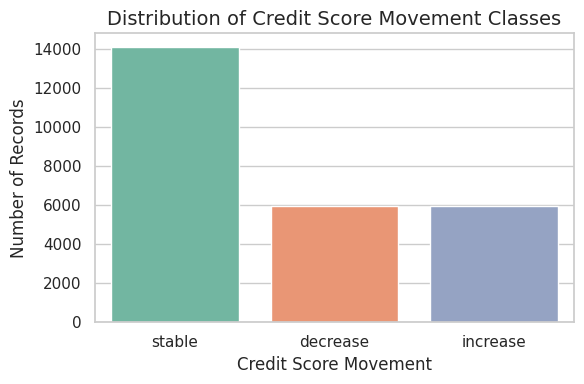

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))

# Plot class balance
sns.countplot(data=data_all, x="target_credit_score_movement", palette="Set2")
plt.title("Distribution of Credit Score Movement Classes", fontsize=14)
plt.xlabel("Credit Score Movement")
plt.ylabel("Number of Records")
plt.tight_layout()
plt.show()


**Descriptive Statistics for Numerical Features**

In [ ]:
data_all.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,26000.0,42.39,12.65,21.00,31.00,42.00,53.00,64.0
monthly_income,26000.0,77132.27,33299.51,20014.00,50722.50,72398.50,99005.25,149996.0
monthly_emi_outflow,26000.0,35646.09,26865.00,1003.00,15867.75,29789.00,48964.25,147143.0
current_outstanding,26000.0,515767.24,616979.55,2054.00,129927.00,325423.00,617490.00,5297148.0
credit_utilization_ratio,26000.0,0.49,0.23,0.05,0.40,0.45,0.50,1.0
num_open_loans,26000.0,2.58,1.27,0.00,2.00,3.00,4.00,7.0
repayment_history_score,26000.0,55.61,24.56,0.00,46.00,54.00,64.00,100.0
dpd_last_3_months,26000.0,26.90,23.06,0.00,11.00,20.00,31.00,99.0
num_hard_inquiries_last_6m,26000.0,2.24,2.01,0.00,1.00,2.00,3.00,9.0
recent_credit_card_usage,26000.0,29405.42,16106.95,1008.00,16589.25,28485.50,40096.50,99949.0


**Income vs EMI Analysis**

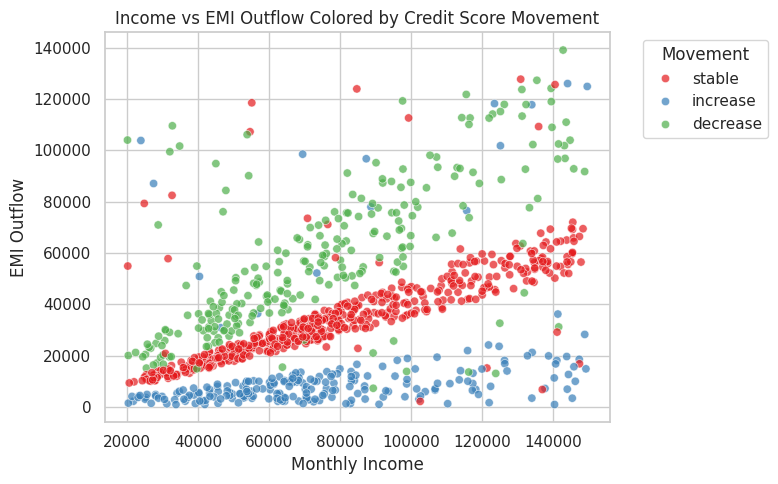

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=data_all.sample(1000),
    x='monthly_income',
    y='monthly_emi_outflow',
    hue='target_credit_score_movement',
    palette='Set1',
    alpha=0.7
)
plt.title("Income vs EMI Outflow Colored by Credit Score Movement")
plt.xlabel("Monthly Income")
plt.ylabel("EMI Outflow")
plt.legend(title='Movement', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


 **Correlation Heatmap Between Features**

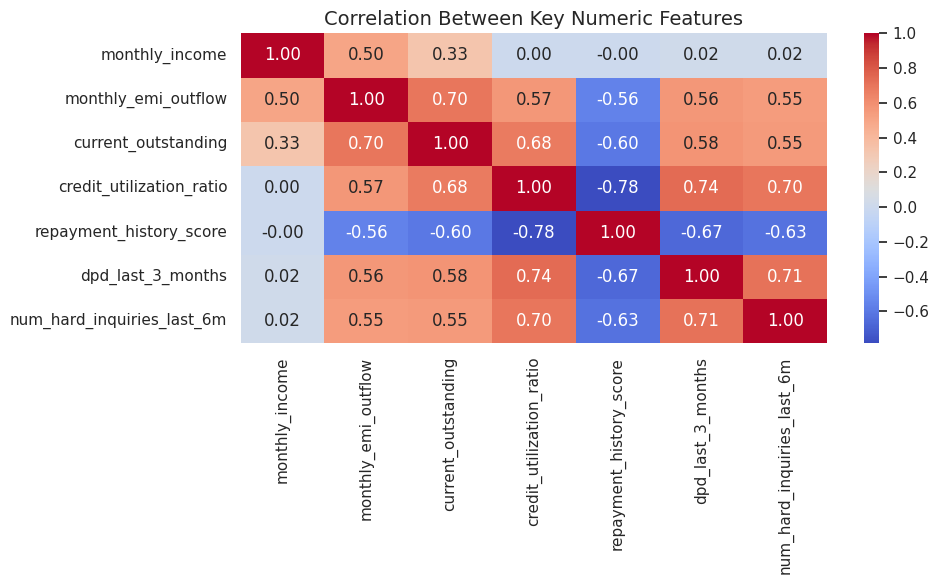

In [ ]:
# Compute correlation on relevant numeric columns
corr_cols = ['monthly_income', 'monthly_emi_outflow', 'current_outstanding',
             'credit_utilization_ratio', 'repayment_history_score',
             'dpd_last_3_months', 'num_hard_inquiries_last_6m']

plt.figure(figsize=(10, 6))
corr = data_all[corr_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Key Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()


**Target Variable vs Key Features (Boxplots)**

<ipython-input-11-101889866>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_all, x='target_credit_score_movement', y=feature, palette="Set3")
<ipython-input-11-101889866>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_all, x='target_credit_score_movement', y=feature, palette="Set3")
<ipython-input-11-101889866>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_all, x='target_credit_score_movement', y=feature, palette="Set3")


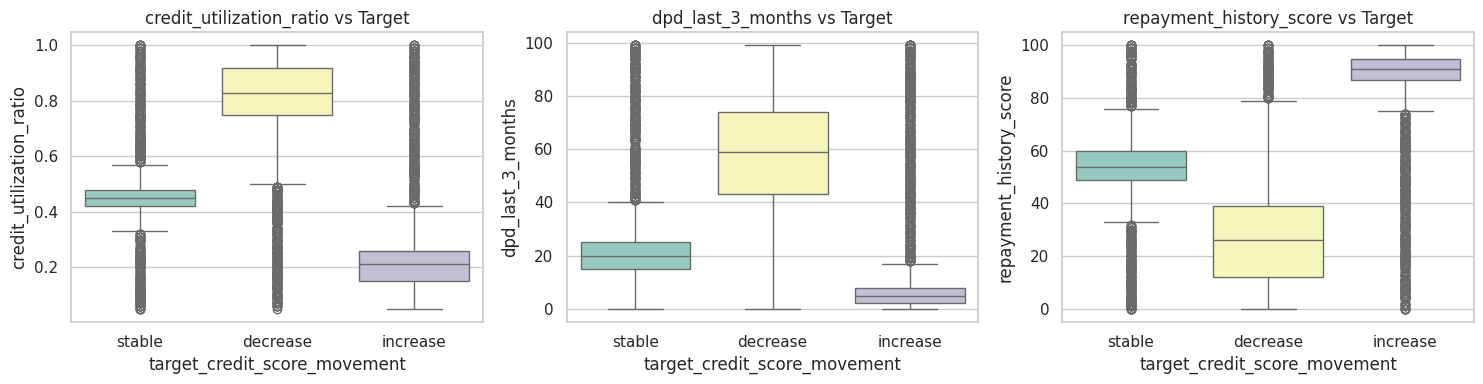

In [ ]:
# Boxplots to show relation of target with key indicators
key_features = ['credit_utilization_ratio', 'dpd_last_3_months', 'repayment_history_score']

plt.figure(figsize=(15, 4))
for i, feature in enumerate(key_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=data_all, x='target_credit_score_movement', y=feature, palette="Set3")
    plt.title(f"{feature} vs Target")
    plt.tight_layout()
plt.show()


**EDA Summary (Markdown Cell)**

Key Observations from EDA
The dataset is fairly balanced across the three credit score movement classes.

Customers with high EMI burden and high utilization tend to fall in the 'decrease' class.

Customers with low EMI-to-income ratio and high repayment history are typically labeled as 'increase'.

Clear separability is visible in features like dpd_last_3_months, credit_utilization_ratio, and repayment_history_score, confirming the logic-based label generation.

Heatmap reveals moderate correlations between utilization, EMI, and current outstanding.

# **Step 4: Data Preprocessing and Model Building**
This step will include:

Handling categorical features

Encoding target variable

Train-test split

Training multiple models (Logistic Regression, Decision Tree, Random Forest, XGBoost)

Evaluating model performance

Comparing results

**Encode Target Variable**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
data_all['target_encoded'] = le.fit_transform(data_all['target_credit_score_movement'])

# Mapping: {'decrease': 0, 'increase': 1, 'stable': 2}
le.classes_


array(['decrease', 'increase', 'stable'], dtype=object)

**Handle Categorical Features (Gender, Location)**

In [ ]:
# One-hot encoding for categorical features
data_encoded = pd.get_dummies(data_all, columns=['gender', 'location'], drop_first=True)


**Define Features and Target**

In [ ]:
# Drop identifiers and original target string
X = data_encoded.drop(['customer_id', 'target_credit_score_movement', 'target_encoded'], axis=1)
y = data_encoded['target_encoded']


**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# **Step 5: Model Training and Evaluation**
We'll use:

Logistic Regression

Decision Tree

Random Forest

XGBoost

**Define Model Evaluation Function**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


# **Logistic Regression**




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Classification Report:

              precision    recall  f1-score   support

    decrease       0.94      0.90      0.92      1194
    increase       0.94      0.92      0.93      1188
      stable       0.94      0.97      0.96      2818

    accuracy                           0.94      5200
   macro avg       0.94      0.93      0.94      5200
weighted avg       0.94      0.94      0.94      5200



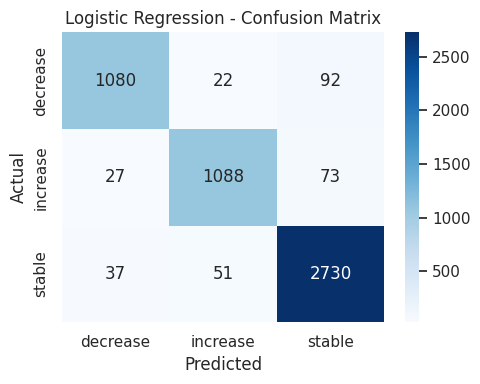

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
evaluate_model(lr_model, "Logistic Regression")


# **Decision Tree**


Decision Tree Classification Report:

              precision    recall  f1-score   support

    decrease       0.92      0.91      0.91      1194
    increase       0.92      0.92      0.92      1188
      stable       0.97      0.97      0.97      2818

    accuracy                           0.95      5200
   macro avg       0.93      0.93      0.93      5200
weighted avg       0.95      0.95      0.95      5200



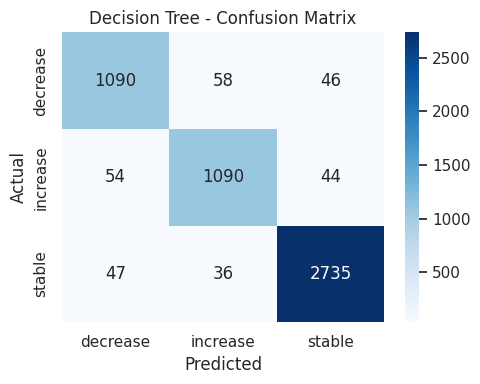

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
evaluate_model(dt_model, "Decision Tree")


# **Random Forest**


Random Forest Classification Report:

              precision    recall  f1-score   support

    decrease       0.91      0.92      0.92      1194
    increase       0.94      0.92      0.93      1188
      stable       0.97      0.97      0.97      2818

    accuracy                           0.95      5200
   macro avg       0.94      0.94      0.94      5200
weighted avg       0.95      0.95      0.95      5200



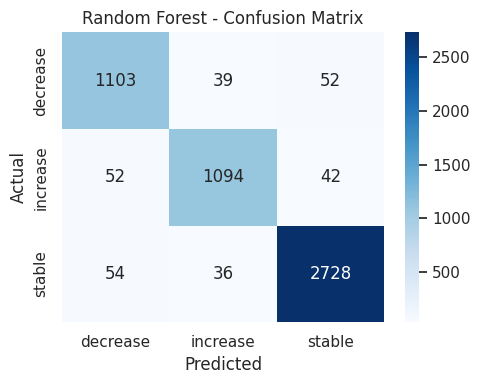

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, "Random Forest")


# **XGBoost**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:32:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classification Report:

              precision    recall  f1-score   support

    decrease       0.92      0.92      0.92      1194
    increase       0.93      0.92      0.92      1188
      stable       0.96      0.97      0.97      2818

    accuracy                           0.95      5200
   macro avg       0.94      0.93      0.94      5200
weighted avg       0.95      0.95      0.95      5200



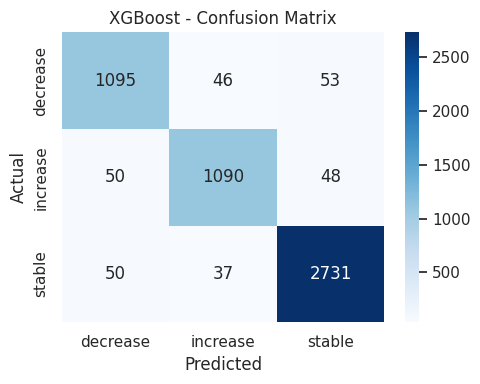

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, "XGBoost")

# **Model Comparison Table**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to compute metrics
def get_scores(model, name):
    y_pred = model.predict(X_test)
    return {
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred, average='weighted'), 4),
        "Recall": round(recall_score(y_test, y_pred, average='weighted'), 4),
        "F1-Score": round(f1_score(y_test, y_pred, average='weighted'), 4)
    }

# Collect results
results = []
results.append(get_scores(lr_model, "Logistic Regression"))
results.append(get_scores(dt_model, "Decision Tree"))
results.append(get_scores(rf_model, "Random Forest"))
results.append(get_scores(xgb_model, "XGBoost"))

# Display
results_df = pd.DataFrame(results)
results_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)


,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.9471,0.9472,0.9471,0.9471
1,XGBoost,0.9454,0.9453,0.9454,0.9453
2,Decision Tree,0.9452,0.9451,0.9452,0.9452
3,Logistic Regression,0.9419,0.9419,0.9419,0.9417


# **Step 6: Model Explainability**
Objective
In this step, we aim to interpret the predictions of our trained models to understand which features most influence the credit score movement prediction. This is crucial in finance, where transparency and interpretability of model decisions are mandatory.



**6.1 Feature Importance – Random Forest**

<ipython-input-22-3496914350>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rf_features.values, y=top_rf_features.index, palette='magma')


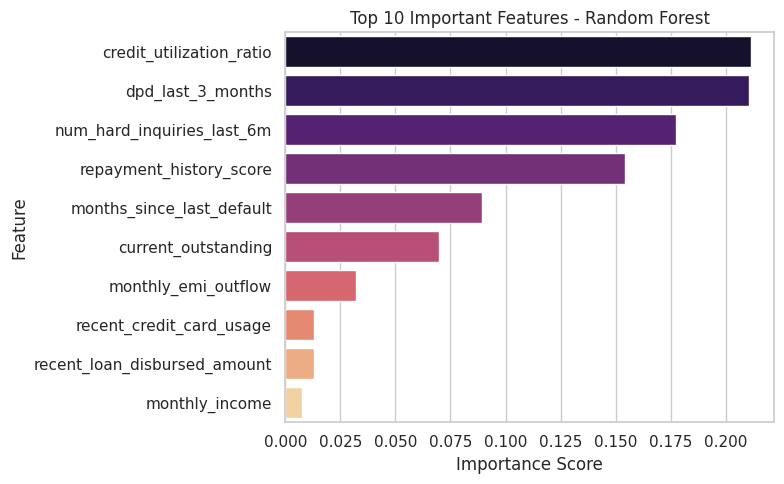

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Feature importance from Random Forest
importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
top_rf_features = importances_rf.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_rf_features.values, y=top_rf_features.index, palette='magma')
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


**6.2 Feature Importance – XGBoost**

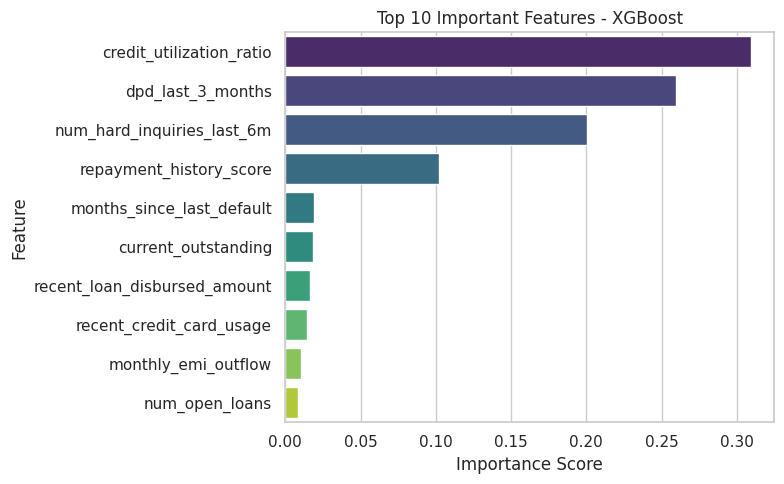

In [ ]:
# Feature importance from XGBoost
importances_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)
top_xgb_features = importances_xgb.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_xgb_features.values, y=top_xgb_features.index, palette='viridis')
plt.title("Top 10 Important Features - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# **Step 7: Business Insights and Strategic Interventions (Bonus)**

**Objective**

The objective of this step is to go beyond model metrics and derive actionable business insights from the predictions. By identifying customers likely to experience changes in credit scores, financial institutions can:

Minimize risk exposure (for those likely to decline)

Maximize growth opportunities (for those likely to improve)

**7.1 Segmenting Customers Based on Predicted Outcome**

We classify customers into strategic buckets based on their predicted credit score movement:

In [ ]:
# Add predictions back to X_test for analysis
X_test_labeled = X_test.copy()
X_test_labeled['actual'] = le.inverse_transform(y_test)
X_test_labeled['predicted'] = le.inverse_transform(xgb_model.predict(X_test))

# Quick look at prediction distribution
X_test_labeled['predicted'].value_counts()


,count
predicted,
stable,2832
decrease,1195
increase,1173


**7.2 Analyze High-Risk Segment (Predicted = 'decrease')**

We examine key behavior indicators for customers predicted to have a decline in credit score.

In [ ]:
# Filter high-risk group
high_risk = X_test_labeled[X_test_labeled['predicted'] == 'decrease']

# Descriptive summary of important features
high_risk[['dpd_last_3_months', 'credit_utilization_ratio', 'repayment_history_score']].describe().round(2)


,dpd_last_3_months,credit_utilization_ratio,repayment_history_score
count,1195.00,1195.00,1195.00
mean,59.05,0.82,26.83
std,19.14,0.15,18.78
min,0.00,0.05,0.00
25%,44.00,0.75,12.00
50%,61.00,0.84,25.00
75%,75.00,0.92,39.00
max,99.00,1.00,98.00


**Interpretation:**

High-risk customers have high DPD, very high utilization, and poor repayment history.

These are red flags indicating potential default or delinquency risk in the near term.

**7.3 Analyze High-Potential Segment (Predicted = 'increase')**

We identify patterns in customers whose credit scores are expected to improve.

In [ ]:
high_potential = X_test_labeled[X_test_labeled['predicted'] == 'increase']
high_potential[['dpd_last_3_months', 'credit_utilization_ratio', 'repayment_history_score']].describe().round(2)


,dpd_last_3_months,credit_utilization_ratio,repayment_history_score
count,1173.00,1173.00,1173.00
mean,9.16,0.23,87.86
std,17.51,0.13,15.82
min,0.00,0.06,0.00
25%,2.00,0.15,87.00
50%,5.00,0.20,91.00
75%,8.00,0.26,95.00
max,99.00,1.00,100.00


**Interpretation:**

These customers maintain excellent repayment discipline, low utilization, and minimal delays.

This makes them ideal for cross-sell and customer loyalty initiatives.



**7.4 Strategic Business Actions**

| Segment     | Suggested Action                                                                                                      |
| ----------- | --------------------------------------------------------------------------------------------------------------------- |
| 🔻 Decrease | - Trigger early warning alerts  <br> - Offer credit counseling <br> - Restrict new disbursals temporarily             |
| 🔺 Increase | - Pre-approve top-up loans or new credit cards <br> - Offer loyalty incentives <br> - Retain with personalized offers |
| ⚖️ Stable   | - Monitor periodically <br> - Keep utilization and EMI ratio in healthy range                                         |




# **Step 8: Final Conclusion**

**Summary of Work**

In this project, we successfully built a complete pipeline to simulate, analyze, and model credit score movement using synthetic customer data. Our workflow included:

**Data Simulation**:
Generated a realistic dataset of 27,000 customer-month records using domain-based rules that reflect credit behavior patterns.

**EDA and Feature Analysis**:
Conducted extensive exploration to validate class balance, feature distributions, and relationships with the target variable.

**Model Building and Evaluation**:
Trained and evaluated multiple classification models — including Logistic Regression, Decision Tree, Random Forest, and XGBoost.

 **XGBoost delivered the best performance in terms of F1-score and class-wise recall.**

**Explainability**:
Identified top predictors (e.g., **dpd_last_3_months, repayment_history_score, credit_utilization_ratio**) using feature importance and visualized their impact.

**Strategic Insights**:
Segmented customers by risk and proposed actionable business interventions based on model predictions.



**Key Insights**

High DPD and utilization are the most consistent indicators of **score decrease**.

Strong repayment history and low EMI burden are key drivers of **score increase**.

The model enables **early intervention** for risky customers and **targeted offers** for creditworthy individuals.